<a href="https://colab.research.google.com/github/DevMed22/Revive_My_Memory/blob/model/Understand_prepare_DCM_files_FirstSprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data downloading and preparation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/ADNI_data/EMCI_Collection.zip -d /content/drive/MyDrive/ADNI_data/EMCI

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_4473/MPRAGE_SENSE2/2012-02-10_08_29_21.0/I283881/ADNI_002_S_4473_MR_MPRAGE_SENSE2__br_raw_20120210140724284_77_S140458_I283881.dcm  
  inflating: /content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_4473/MPRAGE_SENSE2/2012-02-10_08_29_21.0/I283881/ADNI_002_S_4473_MR_MPRAGE_SENSE2__br_raw_20120210140957502_125_S140458_I283881.dcm  
  inflating: /content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_4473/MPRAGE_SENSE2/2012-02-10_08_29_21.0/I283881/ADNI_002_S_4473_MR_MPRAGE_SENSE2__br_raw_20120210140749450_73_S140458_I283881.dcm  
  inflating: /content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_4473/MPRAGE_SENSE2/2012-02-10_08_29_21.0/I283881/ADNI_002_S_4473_MR_MPRAGE_SENSE2__br_raw_20120210140324972_138_S140458_I283881.dcm  
  inflating: /content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_4473/MPRAGE_SENSE2/2012-02-10_08_29_21.0/I283881/ADNI_002_S_4473_MR_MPRAGE_SENSE2__br_raw_201202101403306

## Merging data

In [ ]:
import os
import shutil

In [ ]:
  # list of folder pathes to be merged
list_dir = ['/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/3_Plane_Localizer/2010-06-24_14_21_28.0/I180306'
, '/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/3_Plane_Localizer/2010-06-24_14_21_28.0/I180307','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/3_Plane_Localizer/2010-06-24_14_21_28.0/I180308',
'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/3_Plane_Localizer/2013-07-18_08_47_45.0/I381522','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/3_Plane_Localizer/2013-07-18_08_47_45.0/I381523',
'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/3_Plane_Localizer/2013-07-18_08_47_45.0/I381531','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Axial_T2-FLAIR/2010-06-24_14_21_28.0/I180309'
,'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Axial_T2-FLAIR/2010-10-22_15_57_38.0/I199144','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Axial_T2-FLAIR/2011-01-22_13_13_59.0/I213884'
,'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Axial_T2-FLAIR/2011-07-07_14_22_50.0/I243873','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Axial_T2-FLAIR/2012-07-11_17_22_08.0/I316037'
,'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Axial_T2-FLAIR/2012-07-11_17_32_18.0/I316039','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Axial_T2-FLAIR/2013-07-18_08_47_45.0/I381528'
,'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Axial_T2-FLAIR/2015-08-13_07_57_55.0/I505162','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Axial_T2-Star/2010-06-24_14_21_28.0/I180304'
,'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Axial_T2-Star/2010-10-22_16_02_57.0/I199146','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Axial_T2-Star/2011-01-22_13_18_48.0/I213878'
,'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Axial_T2-Star/2011-07-07_14_27_08.0/I243877','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Axial_T2-Star/2012-07-11_17_26_53.0/I316040'
,'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Axial_T2-Star/2013-07-18_08_47_45.0/I381527','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Axial_T2-Star/2015-08-13_07_57_55.0/I505160'
,'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Axial_T2-TSE_with_Fat_Sat/2013-07-18_08_47_45.0/I381530','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Axial_T2-TSE_with_Fat_Sat/2015-08-13_07_57_55.0/I505157'
,'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Axial_T2-TSE_with_Fat_Sat/2015-08-13_07_57_55.0/I505159','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Field_Mapping/2011-07-07_14_17_48.0/I243874'
,'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Field_Mapping/2011-07-07_14_17_48.0/I243876','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Field_Mapping/2013-07-18_08_47_45.0/I381526'
,'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Field_Mapping/2013-07-18_08_47_45.0/I381529','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Field_Mapping/2015-08-13_07_57_55.0/I505155'
,'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/Field_Mapping/2015-08-13_07_57_55.0/I505164','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/MPRAGE/2010-06-24_14_21_28.0/I180310',
'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/MPRAGE/2010-10-22_15_34_13.0/I199147','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/MPRAGE/2011-01-22_12_44_25.0/I213880'
,'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/MPRAGE/2011-07-07_13_45_06.0/I243872','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/MPRAGE/2012-07-11_16_58_40.0/I316042'
,'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/MPRAGE/2013-07-18_08_47_45.0/I381525','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/MPRAGE/2015-08-13_07_57_55.0/I505158'
,'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/MPRAGE_SENSE2/2010-06-24_14_21_28.0/I180305','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/MPRAGE_SENSE2/2010-10-22_15_45_41.0/I199142'
,'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/MPRAGE_SENSE2/2011-01-22_12_53_46.0/I213881','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/MPRAGE_SENSE2/2011-07-07_13_54_53.0/I243871'
,'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/MPRAGE_SENSE2/2012-07-11_17_08_16.0/I316038','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/MPRAGE_SENSE2/2013-07-18_08_47_45.0/I381532'
,'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/MPRAGE_SENSE2/2015-08-13_07_57_55.0/I505161','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/SURVEY/2010-10-22_15_32_48.0/I199141'
,'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/SURVEY/2010-10-22_15_32_48.0/I199143','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/SURVEY/2010-10-22_15_32_48.0/I199145'
,'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/SURVEY/2011-01-22_12_32_31.0/I213879','/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/SURVEY/2011-01-22_12_32_31.0/I213882'
,'/content/drive/MyDrive/ADNI_data/EMCI/ADNI/002_S_2010/SURVEY/2011-01-22_12_32_31.0/I213883','']
# enumerate on list_dir to get the 
# content of all the folders and store it in a dictionary
content_list = {}
for index, val in enumerate(list_dir):
    path = os.path.join(list_dir, val)
    content_list[ list_dir[index] ] = os.listdir(path)



TypeError: ignored

In [ ]:
list_dir_2= content_list.values()
print(list_dir_2)

dict_values([['Axial_T2-Star', 'MPRAGE_SENSE2', '3_Plane_Localizer', 'Axial_T2-FLAIR', 'MPRAGE', 'SURVEY', 'Field_Mapping', 'Axial_T2-TSE_with_Fat_Sat'], ['MPRAGE', '3_Plane_Localizer', 'Axial_T2-Star', 'Axial_T2-FLAIR', 'MPRAGE_SENSE2', 'Field_Mapping', 'Axial_T2-TSE_with_Fat_Sat']])


In [ ]:
merge_folder_path='/content/drive/MyDrive/ADNI_data/EMCI'
# loop through the list of folders
for sub_dir in content_list:
  
    # loop through the contents of the
    # list of folders
    for contents in content_list[sub_dir]:
  
        # make the path of the content to move 
        path_to_content = sub_dir + "/" + contents  
  
        # make the path with the current folder
        dir_to_move = os.path.join(current_folder, path_to_content )
  
        # move the file
        shutil.move(dir_to_move, merge_folder_path)

Error: ignored

## Reading the data

**What's a DICOM file?**

> I like this explanation from Wikipedia: "DICOM groups information into data sets. For example, a file of a chest x-ray image may contain the patient ID within the file, so that the image can never be separated from this information by mistake. This is similar to the way that image formats such as JPEG can also have embedded tags to identify and otherwise describe the image."








In [3]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.3 MB/s eta 0:00:00


In [5]:
import pydicom
# methods in pydicom?
dir(pydicom)
# I see a read_file and dcmread

['DataElement',
 'Dataset',
 'FileDataset',
 'Sequence',
 '__all__',
 '__builtins__',
 '__cached__',
 '__dicom_version__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '__version_info__',
 '_dicom_dict',
 '_private_dict',
 '_uid_dict',
 '_version',
 'charset',
 'config',
 'data',
 'datadict',
 'dataelem',
 'dataset',
 'dcmread',
 'dcmwrite',
 'dicomdir',
 'encaps',
 'encoders',
 'errors',
 'filebase',
 'filereader',
 'fileutil',
 'filewriter',
 'jsonrep',
 'misc',
 'multival',
 'overlays',
 'pixel_data_handlers',
 'read_file',
 'sequence',
 'tag',
 'uid',
 'util',
 'valuerep',
 'values',
 'warnings',
 'waveforms',
 'write_file']

In [10]:
# Read dcm file
ds = pydicom.read_file("/content/drive/MyDrive/ADNI_data/EMCI/DCM/ADNI_002_S_2010_MR_3_Plane_Localizer__br_raw_20100625000702235_8_S88109_I180306.dcm")

In [9]:
# Explore the dcm file
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 180
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.16.124.113543.6006.99.7978647102410706597
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 2.16.124.113543.6006.99.8067347773067732742
-------------------------------------------------
(0008, 0000) Group Length                        UL: 1010
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_FFE', 'M', 'FFE']
(0008, 0013) Instance Creation Time              TM: '163328'
(0008, 0014) Instance Creator UID                UI: 2.16.124.113543.6006.99.3051493601938435224
(0008, 0016) SOP Class UID                       UI: M

## Plotting the data

In [11]:
import matplotlib.pyplot as plt

In [13]:
# Credits: https://pydicom.github.io/pydicom/stable/auto_examples/input_output/plot_read_dicom.html#sphx-glr-auto-examples-input-output-plot-read-dicom-py
if 'PixelData' in ds:
    rows = int(ds.Rows)
    cols = int(ds.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(ds.PixelData)))
    if 'PixelSpacing' in ds:
        print("Pixel spacing....:", ds.PixelSpacing)
        
# Pixel data can be used to plot the MRI 

Image size.......: 256 x 256, 131072 bytes
Pixel spacing....: [0.9765625, 0.9765625]


In [14]:
help(plt.imshow) # read more about imshow here: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)
    Display data as an image; i.e. on a 2D regular raster.
    
    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. Note: For actually displaying
    a grayscale image set up the color mapping using the parameters
    ``cmap='gray', vmin=0, vmax=255``.
    
    Parameters
    ----------
    X : array-like or PIL image
        The image data. Supported array shapes are:
    
        - (M, N): an image with scalar data. The values are mapped to
          colors using normalization and a colormap. See parameters *norm*,
          *cmap*, *vmin*, *vmax*.
        - (M, N, 3): an image with RGB values (0-1 float or 

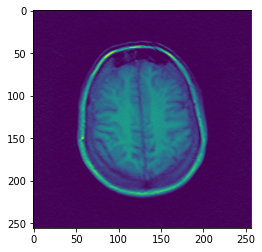

In [16]:
# plot the image using matplotlib
plt.imshow(ds.pixel_array) 
plt.show()


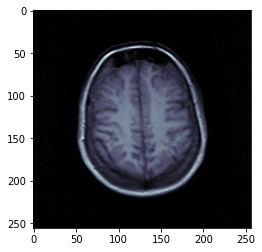

In [21]:
# plot the image using matplotlib after adding the cmap
plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 
plt.show()


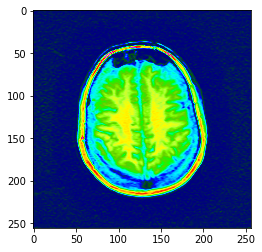

In [20]:
plt.imshow(ds.pixel_array, cmap=plt.cm.gist_ncar) 
plt.show()

### visualize animated dicoms for a patient

In [32]:
import os
import json
import glob
import random
import collections
import numpy as np
import pandas as pd
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation, rc
rc('animation', html='jshtml')
from tqdm import tqdm

In [39]:
files=os.listdir('/content/drive/MyDrive/ADNI_data/EMCI/DCM/ADNI/002_S_4473/Axial_T2-FLAIR/2012-02-10_08_44_53.0/I283877')
print(len(files))
n=len(files)
N=[]
for i in range(n//10):
    N+=[i*10]

35


In [49]:
def load_dicom(path):
    dicom=pydicom.read_file(path,force=True)
    data=dicom.pixel_array
    data=data-np.min(data)
    if np.max(data) != 0:
        data=data/np.max(data)
    data=(data*255).astype(np.uint8)
    return data


def load_dicom_line(path):
    t_paths = sorted(
        glob.glob(os.path.join(path,"*")), 
        key=lambda x: x[:-4].split("_")[-1],
    )
    images = []
    for filename in tqdm(np.array(t_paths)[N]):
        data = load_dicom(filename)
        if data.max() == 0:
            continue
        images.append(data)
        
    return images


def create_animation(ims):
    fig=plt.figure(figsize=(7,7))
    plt.axis('off')
    im=plt.imshow(ims[0],cmap="gray")

    def animate_func(i):
        im.set_array(ims[i])
        return [im]

    return animation.FuncAnimation(fig, animate_func, frames=len(ims), interval=1000)





100%|██████████| 3/3 [00:00<00:00,  4.34it/s]


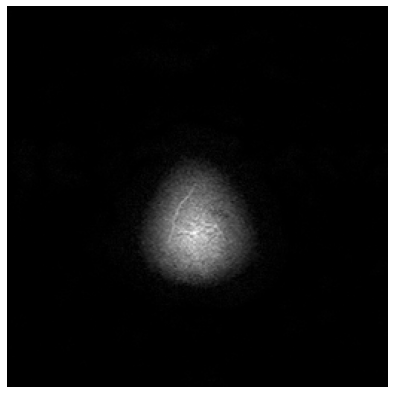

In [50]:
images = load_dicom_line('/content/drive/MyDrive/ADNI_data/EMCI/DCM/ADNI/002_S_4473/Axial_T2-FLAIR/2012-05-17_12_36_54.0/I305238')
create_animation(images)


## image processing and remove noise

In [51]:
# first a conservative filter for grayscale images will be defined.
def conservative_smoothing_gray(data, filter_size):
  temp = []
    
  indexer = filter_size // 2
    
  new_image = data.copy()
    
  nrow, ncol = data.shape
    
  for i in range(nrow):
      
      for j in range(ncol):
          
          for k in range(i-indexer, i+indexer+1):
              
              for m in range(j-indexer, j+indexer+1):
                  
                  if (k > -1) and (k < nrow):
                      
                      if (m > -1) and (m < ncol):
                          
                          temp.append(data[k,m])
                          
          temp.remove(data[i,j])
          
          
          max_value = max(temp)
          
          min_value = min(temp)
          
          if data[i,j] > max_value:
              
              new_image[i,j] = max_value
          
          elif data[i,j] < min_value:
              
              new_image[i,j] = min_value
          
          temp =[]
  
  return new_image.copy()

TypeError: ignored

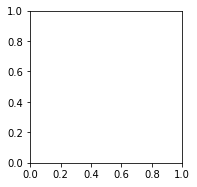

In [55]:
new_image = conservative_smoothing_gray(ds.pixel_array,5)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(ds, cmap=plt.cm.bone),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap=plt.cm.bone),plt.title('Conservative Smoothing')
plt.xticks([]), plt.yticks([])
plt.show()